## Multi-label classification

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [38]:
from pathlib import Path

import numpy as np
import pandas as pd
from fastai.vision import *

In [39]:
np.random.seed(303)

In [40]:
tfms = get_transforms(max_lighting=0.05, max_rotate=1., max_zoom=1.05, max_warp=0.)

In [41]:
src = (ImageList.from_csv(dataroot, 'labels.csv', folder='images', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))

In [58]:
data = (src.transform(tfms, size=64, padding_mode='zeros', resize_method=ResizeMethod.PAD)
        .databunch().normalize(imagenet_stats))

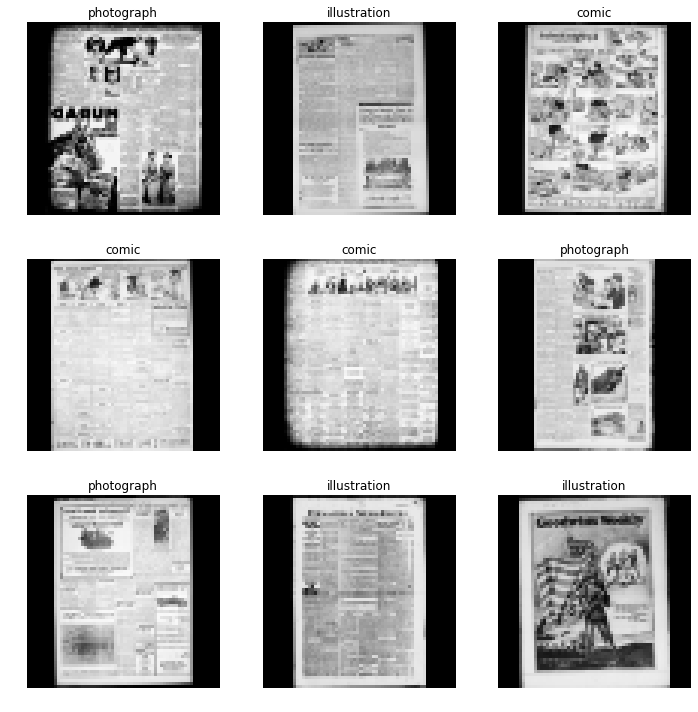

In [59]:
data.show_batch(rows=3, figsize=(10, 10))

In [60]:
arch = models.resnet34

In [61]:
learn = create_cnn(data, arch)

In [62]:
lrf = learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


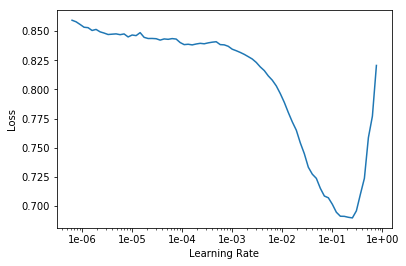

In [51]:
learn.recorder.plot()

In [63]:
lr = 2e-2

In [64]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,time
1,0.717614,0.433412,00:14
2,0.537626,0.367521,00:15
3,0.461538,0.334898,00:14
4,0.418632,0.317288,00:14
5,0.389065,0.318924,00:14


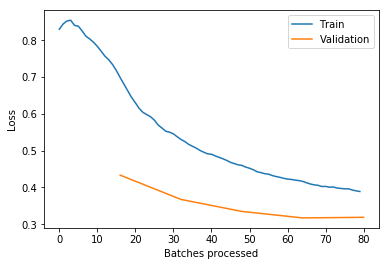

In [65]:
learn.recorder.plot_losses()